##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 2 Report

### Group Members: Zhiyu Ju, Ethan Jiang

In [3]:
import numpy as np
from IPython.display import Image #For displaying images in colab jupyter cell

# Exercise 1: Loops vs Numpy operations

<img src="lab2_exercise1.png" width="1000">

In [4]:
import time # Import time to measure computational efficiency of the code

In [5]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [6]:
# Elementwise addition using loop

arr2d_3_loop = np.zeros((1000, 1000)) # Create a placeholder array for arr2d_3

start_time_loop = time.time() # start time of the code

# YOUR CODE HERE FOR ELEMENTWISE ADDITION USING TWO NESTED LOOPS
for i in range(1000): # iterate over first dimension
    for j in range(1000): #iterate over second dimension
        arr2d_3_loop[i,j] = arr2d_1[i, j] + arr2d_2[i, j]

end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

0.5190370082855225


In [7]:
# Elementwise addition using Numpy function

start_time_np = time.time()

arr2d_3_np = np.add(arr2d_1, arr2d_2) ## np.add(arr2d_1, arr2d_2)

end_time_np = time.time()

elapsed_time_np = end_time_np - start_time_np
print(elapsed_time_np)

0.006149768829345703


In [8]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

True

### Which computation is faster and by what factor?
### e.g. a code that takes 0.1s is faster by a factor of 10 compared to a code that takes 1s

#### Answer: The for loop took 0.35s, and the np addition took 0.002s. Therefore, np-addition is faster than for loop by a factor of 100.

# Exercise 2: Generate Triangular Waveform

<img src="lab2_exercise2.png" width="1000">

In [9]:
import matplotlib.pyplot as plt

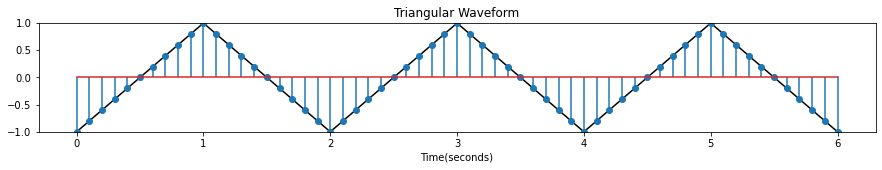

In [10]:
# Your code here
sampling_freq = 10 
freq = 0.5
period = 1/freq # T for triangular wave
amp = 1
x=np.arange(0, 6+1/sampling_freq, 1/sampling_freq) # Create x axis data with samping frequency of 10Hz.
y=(4*amp/period)*np.abs((x-period/2)%period-period/2)-amp # Equation of triangular wave function (ask TA for validity)
fig_1 = plt.figure(1,figsize=(15,2)) # Create figure 1 and set the size of the plot
plt.plot(x,y,color='black') # Plot the outline of wave using black color
plt.stem(x,y) # Plot wave in stem style
plt.title('Triangular Waveform')
plt.xlabel('Time(seconds)')
plt.ylim(-1, 1) # Set y limits 
plt.show()

# Exercise 3: Sinusoidal Generator

<img src="lab2_exercise3.png" width="1000">

In [11]:
# Define generate_sine function

def generate_sine(t_duration, f0, fs):  # f0 is sound freq in Hz, fs is sample freq in Hz
    
    # YOUR CODE HERE
    t_arr=np.arange(0, t_duration+1/fs, 1/fs) # Create x axis data from 0 to t_duration with sampling frequency fs
    ang_freq=2*np.pi*f0 # convert to angular frequency
    amplitudes=np.sin(ang_freq*t_arr) # Generate y axis data
    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 

In [12]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)

# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

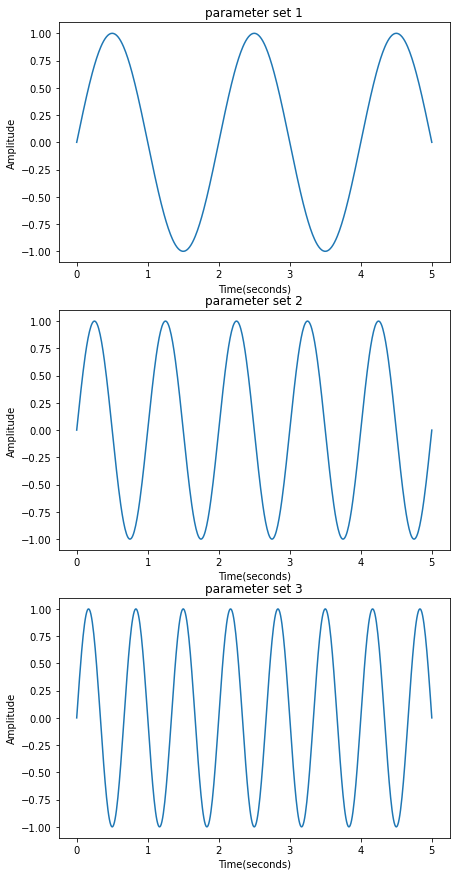

In [13]:
# Plot 3 x 1 subplot showing all three waveform

# YOUR CODE HERE
fig = plt.figure(figsize=(7,15))

# plot parameter set 1
plt.subplot(311) 
plt.plot(t_arr_1, amplitudes_1)
plt.title('parameter set 1')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')

# plot parameter set 2
plt.subplot(312)
plt.plot(t_arr_2, amplitudes_2)
plt.title('parameter set 2')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')

# plot parameter set 3
plt.subplot(313)
plt.plot(t_arr_3, amplitudes_3)
plt.title('parameter set 3')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')

plt.show()

# Exercise 4: Notes Synthesis

<img src="lab2_exercise4.png" width="1000">

In [14]:
import simpleaudio as sa  
from scipy.io import wavfile as wav  

In [15]:
# YOUR CODE HERE
# Generate wave for 8 notes 
A_t, A_amp = generate_sine(1, 220, 8000)
B_t, B_amp = generate_sine(1, 220*2**(2/12), 8000)
C_t, C_amp = generate_sine(1, 220*2**(4/12), 8000)
D_t, D_amp = generate_sine(1, 220*2**(5/12), 8000)
E_t, E_amp = generate_sine(1, 220*2**(7/12), 8000)
F_t, F_amp = generate_sine(1, 220*2**(9/12), 8000)
G_t, G_amp = generate_sine(1, 220*2**(11/12), 8000)
A_t_2, A_amp_2 = generate_sine(1, 440, 8000)
# Concatenate 8 notes
a_major=np.concatenate([A_amp,B_amp,C_amp,D_amp,E_amp,F_amp,G_amp,A_amp_2])*32767
a_f = np.flip(a_major)

In [16]:
# Write into an audio file
outfile = 'a_major_scale.wav'
wav.write(outfile, 8000, a_major.astype('int16'))
outfile = 'a_major_scale_flip.wav'
wav.write(outfile, 8000, a_f.astype('int16'))
#Play
wav_obj = sa.WaveObject.from_wave_file('a_major_scale.wav')     
play_obj = wav_obj.play()
play_obj.wait_done()

In [17]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 

# Exercise 5: Chord Synthesis

<img src="lab2_exercise5.png" width="1000">

In [24]:
# YOUR CODE HERE
# Add notes to make 6 chords
chord_1=np.stack([A_amp,C_amp])  # two channels, 2d array
chord_2=np.stack([B_amp,D_amp])
chord_3=np.stack([C_amp,E_amp])
chord_4=np.stack([D_amp,F_amp])
chord_5=np.stack([E_amp,G_amp])
chord_6=np.stack([F_amp,A_amp_2])
# Concatenate and reshape
chords=(np.hstack([chord_1,chord_2,chord_3,chord_4,chord_5,chord_6])*32767).T

In [25]:
# Write into an audio file
outfile = '6_chords.wav'
wav.write(outfile, 8000, chords.astype('int16'))   # outfile name, sampling freq, sound type
#Play
wav_obj = sa.WaveObject.from_wave_file('6_chords.wav')     
play_obj = wav_obj.play()
play_obj.wait_done()

In [23]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 